# Linear Regression Model

In this project we worked with housing data for the city of Ames, Iowa, United States from 2006 to 2010 and try to make predictions on the Sale price.
You can read more about the collected data [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv('AmesHousing.tsv', sep='\t')

In [3]:
data.head()
data.shape

(2930, 82)

In [4]:
def transform_features(data):
    return data
def select_features(data):
    return data[['Gr Liv Area','SalePrice']]
def train_and_test(data):
    train= data[:1460]
    test= data[1460:]
    
# Selection of Numerical columns from both dataframes.
    numerical_train= train.select_dtypes(include=['float','integer'])
    numerical_test= test.select_dtypes(include=['float','integer'])

# Remove SalePrice column from new dataframes.

    features = numerical_train.columns.tolist()
    features.remove("SalePrice")

# Train the model
    lr= LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    test_predictions= lr.predict(test[features])
    mse= mean_squared_error(test['SalePrice'], test_predictions)
    rsq= r2_score(test['SalePrice'], test_predictions)
    print('R square: ' , round(rsq,3))
    rmse= mse ** 0.5
    return  rmse

transform_df = transform_features(data)
new_df = select_features(transform_df)
rmse = train_and_test(new_df)
print('The RMSE of given model is: {:.3f}'.format(rmse))


R square:  0.507
The RMSE of given model is: 57088.252


In [5]:
# Before transforming df.
data.isnull().sum()

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

#### Feature Engineering

1. Remove any columns from the data frame with more than 25% missing values.
2. Remove columns showing information about the Sales.
3. For Numerical columns with missing values, fill in with the most common value in that column.

In [6]:
# remove col having more than 5% of missing values.
null_col= data.isnull().sum()
dropping_columns= data[null_col[null_col > len(data)*(5/100)].index]
data= data.drop(dropping_columns, axis=1)

In [7]:
# After tranforming
data.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Area            0
Street              0
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type       23
Mas Vnr Area       23
Exter Qual          0
Exter Cond          0
Foundation          0
Bsmt Qual          80
                   ..
Electrical          1
1st Flr SF          0
2nd Flr SF          0
Low Qual Fin SF     0
Gr Liv Area         0
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Fireplaces

In [8]:
# Obj columns to be dropped
str_count = data.select_dtypes(include=['object']).isnull().sum()
drop_missing_cols = str_count[str_count > 0]
data = data.drop(drop_missing_cols.index, axis=1)

In [9]:
# Imputation for Numerical columns contain less than 5% missing values.

num_columns= data.select_dtypes(['integer','float']).isnull().sum()
num_missing= num_columns[num_columns>0 & (num_columns<len(data)*(5/100))]
num_missing.sort_values()


BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [10]:
## Compute the most common value for each column in num_missing, convert this series into dict.
val_mode= data[num_missing.index].mode() # computed mode for common occurrence.
val_dict= val_mode.to_dict(orient='record')[0]
val_dict
data= data.fillna(val_dict)
num_missing.isnull().sum()

0

In [11]:
# Adding new feature as per house sold data.

years_sold= data['Yr Sold']-data['Year Built']
years_sold_ren= data['Yr Sold']-data['Year Remod/Add']

In [12]:
years_sold[years_sold<0]

2180   -1
dtype: int64

In [13]:
years_sold_ren[years_sold_ren<0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [14]:
data['years_sold']= years_sold
data['years_sold_ren']= years_sold_ren

# Remove row values having negative data
data= data.drop([1702,2180,2181], axis=0)


In [15]:
# Drop 'Year Built', 'Year Remod/Add' columns as they don't need now.
data= data.drop(['Year Built', 'Year Remod/Add'], axis=1)

In [16]:
# Remove any columns that leak information about the sale.
data= data.drop(["Mo Sold",'Sale Type', "Sale Condition",'Yr Sold'], axis=1)

In [17]:
# Remove columns which are not providing any relative info to ML."""

data= data.drop(["PID","Order","Enclosed Porch"], axis=1)

Update transform_features function!

In [18]:
def transform_features(data):
# remove col having more than 5% of missing values.
    null_col= data.isnull().sum()
    dropping_columns= data[null_col[null_col > len(data)*(5/100)].index]
    data= data.drop(dropping_columns, axis=1)
# Imputation for Numerical columns contain less than 5% missing values.

    num_columns= data.select_dtypes(['integer','float']).isnull().sum()
    num_missing= num_columns[num_columns>0 & (num_columns<len(data)*(5/100))]
    val_dict = data[num_missing.index].mode().to_dict(orient='records')[0]    
    data= data.fillna(val_dict)
    num_missing.isnull().sum()
# Obj columns to be dropped
    str_count = data.select_dtypes(include=['object']).isnull().sum()
    drop_missing_cols = str_count[str_count > 0]
    data = data.drop(drop_missing_cols.index, axis=1)
    
    years_sold= data['Yr Sold']-data['Year Built']
    years_sold_ren= data['Yr Sold']-data['Year Remod/Add']
    data['years_sold']= years_sold
    data['years_sold_ren']= years_sold_ren

    data= data.drop([1702,2180,2181], axis=0)
    
    data= data.drop(["Mo Sold",'Sale Type', "Sale Condition",'Yr Sold'], axis=1)

    data= data.drop(["PID","Order",'Enclosed Porch'], axis=1)    
     
    return data

def select_features(data):
    return data[['Gr Liv Area','SalePrice']]

def train_and_test(data):
    train= data[:1460]
    test= data[1460:]
    
# Selection of Numerical columns from both dataframes.
    numerical_train= train.select_dtypes(include=['float','integer'])
    numerical_test= test.select_dtypes(include=['float','integer'])

# Remove SalePrice column from new dataframes.

    features = numerical_train.columns.tolist()
    features.remove("SalePrice")

# Train the model
    lr= LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    test_predictions= lr.predict(test[features])
    mse= mean_squared_error(test['SalePrice'], test_predictions)
    rsq= r2_score(test['SalePrice'], test_predictions)
    print('R square: ' , round(rsq,3))
    rmse= mse ** 0.5
    return  rmse

data = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(data)
new_df = select_features(transform_df)
rmse = train_and_test(new_df)
print('The RMSE of given model is: {:.3f}'.format(rmse))


R square:  0.539
The RMSE of given model is: 55275.367


Correlation heatmap matrix

In [19]:
num_train= transform_df.select_dtypes(include=['float','integer']) # selecting num cols.
cor_train_df= num_train.corr() # calculated correlation of num cols
cor_saleprice= abs(cor_train_df.SalePrice) # correlation with target col

# Keep columns having correlation greater than 0.3 with Saleprice col.
strong_cor= cor_saleprice[cor_saleprice > 0.3]
corrmat= transform_df[strong_cor.index].corr()
corrmat


,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,SalePrice,years_sold,years_sold_ren
Overall Qual,1.000000,0.596404,0.568942,0.418972,0.278274,0.545792,0.474888,0.567902,0.520942,0.376199,0.391604,0.598485,0.561303,0.253120,0.290553,0.801206,-0.596358,-0.570231
Year Built,0.596404,1.000000,0.611549,0.305963,0.279569,0.409489,0.310904,0.239688,0.468698,0.109148,0.169559,0.536465,0.479752,0.228135,0.194882,0.558490,-0.999054,-0.612407
Year Remod/Add,0.568942,0.611549,1.000000,0.189846,0.150011,0.298117,0.241128,0.316236,0.456567,0.195469,0.132178,0.424706,0.374299,0.217017,0.239191,0.533007,-0.609186,-0.998006
Mas Vnr Area,0.418972,0.305963,0.189846,1.000000,0.284305,0.378545,0.376205,0.387355,0.252318,0.267328,0.267449,0.354753,0.365786,0.158743,0.123395,0.506983,-0.306163,-0.190821
BsmtFin SF 1,0.278274,0.279569,0.150011,0.284305,1.000000,0.522775,0.439662,0.188245,0.073805,0.030338,0.293897,0.252932,0.303824,0.216577,0.105248,0.439284,-0.278070,-0.148456
Total Bsmt SF,0.545792,0.409489,0.298117,0.378545,0.522775,1.000000,0.792227,0.426689,0.324943,0.266420,0.331919,0.438589,0.482306,0.222595,0.222762,0.644012,-0.409209,-0.298629
1st Flr SF,0.474888,0.310904,0.241128,0.376205,0.439662,0.792227,1.000000,0.546943,0.372838,0.377083,0.406965,0.441002,0.488603,0.218907,0.212943,0.635185,-0.310902,-0.241824
Gr Liv Area,0.567902,0.239688,0.316236,0.387355,0.188245,0.426689,0.546943,1.000000,0.633355,0.806092,0.455685,0.489469,0.480458,0.244285,0.321770,0.717596,-0.240369,-0.317779
Full Bath,0.520942,0.468698,0.456567,0.252318,0.073805,0.324943,0.372838,0.633355,1.000000,0.528647,0.229024,0.477338,0.405233,0.178688,0.255378,0.546118,-0.468171,-0.456866
TotRms AbvGrd,0.376199,0.109148,0.195469,0.267328,0.030338,0.266420,0.377083,0.806092,0.528647,1.000000,0.300400,0.353491,0.322227,0.148608,0.222813,0.498574,-0.110243,-0.197317


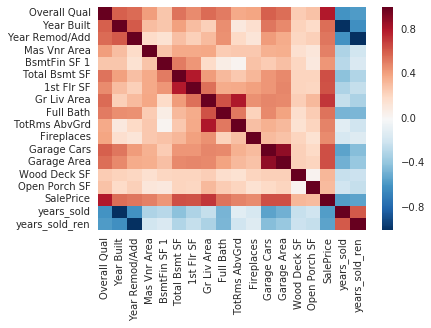

In [20]:
%matplotlib inline 
sns.heatmap(corrmat)

In [21]:
#Drop cols with low corr.
transform_df= transform_df.drop(cor_saleprice[cor_saleprice < 0.3].index, axis=1)

Categorical columns

In [22]:
transform_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 43 columns):
MS Zoning         2927 non-null object
Street            2927 non-null object
Lot Shape         2927 non-null object
Land Contour      2927 non-null object
Utilities         2927 non-null object
Lot Config        2927 non-null object
Land Slope        2927 non-null object
Neighborhood      2927 non-null object
Condition 1       2927 non-null object
Condition 2       2927 non-null object
Bldg Type         2927 non-null object
House Style       2927 non-null object
Overall Qual      2927 non-null int64
Year Built        2927 non-null int64
Year Remod/Add    2927 non-null int64
Roof Style        2927 non-null object
Roof Matl         2927 non-null object
Exterior 1st      2927 non-null object
Exterior 2nd      2927 non-null object
Mas Vnr Area      2927 non-null float64
Exter Qual        2927 non-null object
Exter Cond        2927 non-null object
Foundation        2927 non-null objec

In [23]:
## List of column names categorized as nominal variables are candidates for being converted to categorical
nominal_features = ["PID","MS SubClass", "MS Zoning", "Street", "Land Contour","Lot Shape", "Lot Config", "Neighborhood", "Land Contour",
                    "Condition 1", "Condition 2", "Bldg Type","Utilities", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Exter Cond", "Foundation", "Heating", "Central Air", "Garage Type","Fence" 
                    "Misc Feature", "Sale Type", "Sale Condition","Electrical"]
         
# Cols from above list are available to us or not.    
transform_col_list= list()
for col in nominal_features:
    if col in transform_df.columns:
        transform_col_list.append(col)
transform_col_list    

['MS Zoning',
 'Street',
 'Land Contour',
 'Lot Shape',
 'Lot Config',
 'Neighborhood',
 'Land Contour',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'Utilities',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Exter Cond',
 'Foundation',
 'Heating',
 'Central Air']

In [24]:
# Use "transform_col_list" to count unique counts in each categorical column.
unique_count= transform_df[transform_col_list].apply(lambda col: len(col.value_counts()))
unique_count

MS Zoning        7
Street           2
Land Contour     4
Lot Shape        4
Lot Config       5
Neighborhood    28
Land Contour     4
Condition 1      9
Condition 2      8
Bldg Type        5
Utilities        3
House Style      8
Roof Style       6
Roof Matl        8
Exterior 1st    16
Exterior 2nd    17
Exter Cond       5
Foundation       6
Heating          6
Central Air      2
dtype: int64

In [25]:
# Drop the  categorical columns having more than 10 unique values.
drop_col= transform_df[unique_count[unique_count>10].index]
transform_df.drop(drop_col, axis=1, inplace=True)

In [26]:
# Select obj cols to be converted into category type.
text_cols = transform_df.select_dtypes(include=['object'])
for col in text_cols:
    transform_df[col] = transform_df[col].astype('category')
    
# Compute dummy columns and add back to the dataframe!
transform_df = pd.concat([
    transform_df, 
    pd.get_dummies(transform_df.select_dtypes(include=['category']))
], axis=1).drop(text_cols,axis=1)

In [27]:
transform_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Columns: 134 entries, Overall Qual to Paved Drive_Y
dtypes: float64(5), int64(13), uint8(116)
memory usage: 766.1 KB


In [28]:
def transform_features(data):
# remove col having more than 5% of missing values.
    null_col= data.isnull().sum()
    dropping_columns= data[null_col[null_col > len(data)*(5/100)].index]
    data= data.drop(dropping_columns, axis=1)
# Imputation for Numerical columns contain less than 5% missing values.

    num_columns= data.select_dtypes(['integer','float']).isnull().sum()
    num_missing= num_columns[num_columns>0 & (num_columns<len(data)*(5/100))]
    val_dict = data[num_missing.index].mode().to_dict(orient='records')[0]    
    data= data.fillna(val_dict)
    num_missing.isnull().sum()
# Obj columns to be dropped
    str_count = data.select_dtypes(include=['object']).isnull().sum()
    drop_missing_cols = str_count[str_count > 0]
    data = data.drop(drop_missing_cols.index, axis=1)
    
    years_sold= data['Yr Sold']-data['Year Built']
    years_sold_ren= data['Yr Sold']-data['Year Remod/Add']
    data['years_sold']= years_sold
    data['years_sold_ren']= years_sold_ren

    data= data.drop([1702,2180,2181], axis=0)
    
    data= data.drop(["Mo Sold",'Sale Type', "Sale Condition",'Yr Sold'], axis=1)

    data= data.drop(["PID","Order",'Enclosed Porch'], axis=1)    
     
    return data

def select_features(data):
    
    num_train= data.select_dtypes(include=['float','integer']) # selecting num cols.
    cor_train_df= num_train.corr() # calculated correlation of num cols
    cor_saleprice= abs(cor_train_df.SalePrice)
    data= data.drop(cor_saleprice[cor_saleprice < 0.3].index, axis=1)
    
    return data

def train_and_test(data):
    train= data[:1460]
    test= data[1460:]
    
# Selection of Numerical columns from both dataframes.
    numerical_train= train.select_dtypes(include=['float','integer'])
    numerical_test= test.select_dtypes(include=['float','integer'])

# Remove SalePrice column from new dataframes.

    features = numerical_train.columns.tolist()
    features.remove("SalePrice")

# Train the model
    lr= LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    test_predictions= lr.predict(test[features])
    mse= mean_squared_error(test['SalePrice'], test_predictions)
    rsq= r2_score(test['SalePrice'], test_predictions)
    print('R square: ' , round(rsq,3))
    rmse= mse ** 0.5
    return  rmse

data = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(data)
new_df = select_features(transform_df)
rmse = train_and_test(new_df)
print('The RMSE of given model is: {:.3f}'.format(rmse))


R square:  0.798
The RMSE of given model is: 36612.284


As per the R square this model is 80% accurate and Linear Regression model tends to less overfit so this model is fairly good enough.